### Data Processing

In [1]:
import pandas as pd
import qgrid
from functools import reduce
import collections
import numpy as np
import unicodedata

In [104]:
source_path = 'D:/Users/rdemaio/Desktop/Practice ML/indago_arxiv/data/source/'
end_path = 'D:/Users/rdemaio/Desktop/Practice ML/indago_arxiv/data/processed/'
filename = 'sourcesample_v2017.csv'

In [3]:
cols = ['Unnamed: 0', 'abstract', 'authors','categories','created','updated','id','title']
df = pd.read_csv(source_path + filename)[cols]
df.columns= ['index', 'abstract', 'authors','categories','created','updated','id','title']
df.info()

D:\Users\rdemaio\AppData\Local\Continuum\anaconda3\envs\arxiv\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218961 entries, 0 to 218960
Data columns (total 8 columns):
index         218961 non-null int64
abstract      218961 non-null object
authors       218961 non-null object
categories    218961 non-null object
created       218961 non-null object
updated       114183 non-null object
id            218961 non-null object
title         218961 non-null object
dtypes: int64(1), object(7)
memory usage: 13.4+ MB


In [15]:
df.head(10)

,index,abstract,authors,categories,created,updated,id,title
0,0,"let $(a,\theta)$ be a principally polarised ab...",['andreas höring'],math.ag,2007-04-04,2017-12-18,704.056,m-regularity of the fano surface
1,1,we define an invariant of welded virtual knots...,"['louis h. kauffman', 'joão faria martins']",math.gt hep-th math.qa,2007-04-10,2008-01-25,704.125,invariants of welded virtual knots via crossed...
2,2,we study the model theory of expansions of hil...,"['alexander berenstein', 'tapani hyttinen', 'a...",math.lo,2007-04-12,2017-03-20,704.163,hilbert spaces with generic predicates
3,3,we prove that a banach space x is not super-re...,['florent baudier'],math.fa math.mg,2007-04-16,NaN,704.196,metrical characterization of super-reflexivity...
4,4,"for given matrix $a\in\z^{d\times n}$, the set...","['elke eisenschmidt', 'raymond hemmecke', 'mat...",math.co,2007-04-20,NaN,704.271,computation of atomic fibers of z-linear maps
5,5,a number of results for c$^2$-smooth surfaces ...,"['brendan guilfoyle', 'wilhelm klingenberg']",math.dg,2007-04-24,NaN,704.325,on c$^2$-smooth surfaces of constant width
6,6,we present a systematic procedure to obtain si...,"['a. tanasa', 'a. ballesteros', 'f. j. herranz']",math.qa hep-th math-ph math.mp,2007-04-25,NaN,704.333,solutions for the constant quantum yang-baxter...
7,7,this paper proposes a method to address the lo...,"['victor chernozhukov', 'ivan fernandez-val', ...",stat.me econ.em math.st stat.th,2007-04-27,2014-07-14,704.365,quantile and probability curves without crossing
8,8,"suppose that a target function is monotonic, n...","['victor chernozhukov', 'ivan fernandez-val', ...",stat.me econ.em math.st stat.th,2007-04-27,2010-11-03,704.369,improving estimates of monotone functions by r...
9,9,we define a grid presentation for singular lin...,['benjamin audoux'],math.gt,2007-05-16,2017-10-29,705.238,singular link floer homology


In [16]:
df.describe(include='all')

,index,abstract,authors,categories,created,updated,id,title
count,218961.000000,218961,218961,218961,218961,114183,218961,218961
unique,NaN,39825,33618,4759,2855,1683,60029,39821
top,NaN,"r. guralnick (linear algebra appl. 99, 85-96, ...","['f. reese harvey', 'h. blaine lawson']",math.ap,2017-08-21,2017-11-08,1707.04049,a dirichlet problem for the laplace operator i...
freq,NaN,23,215,12611,644,637,7,19
mean,10752.494019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6980.646506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4698.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,16339.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
sa = df
#parse dates
create_date = sa.created.str.replace('-','').map(lambda x: float(x))
update_date = sa.updated.str.replace('-','').map(lambda x: float(x))

#last_update is the last update date or the creation date if there's none
last_update = update_date
for index, value in last_update.iteritems():
    if np.isnan(value):
        last_update[index] = create_date[index]
sa['last_update'] = last_update        
sa = sa.drop(columns = ['created','updated'])
# sort by id, updated
sa = sa.sort_values(by = ['title','last_update'], ascending = [True, False])
#drop duplicates (1 line per paper)
sa_1 = sa.drop_duplicates(['title'],keep='first')

Now we have only unique values respect to the id received from arxiv. Be aware that there could be still duplicated records, i.e. papers, but this problem would come from arxiv and not the scraping. 

In [12]:
sa_1.describe(include='all')

,index,abstract,authors,categories,created,updated,id,title,last_update
count,39821.000000,39821,39821,39821,39821,18559,39821.0000,39821,3.982100e+04
unique,NaN,39818,33614,4759,2855,1683,39821.0000,39821,NaN
top,NaN,"r. guralnick (linear algebra appl. 99, 85-96, ...",['iosif pinelis'],math.ap,2017-01-23,2017-03-15,1707.0877,a stochastic power management strategy with sk...,NaN
freq,NaN,2,29,2392,135,78,1.0000,1,NaN
mean,16507.924060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.016636e+07
std,7763.793196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.423472e+04
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.995082e+07
25%,9958.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.017020e+07
50%,19915.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.017052e+07
75%,23065.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.017091e+07


In [29]:
sa_2 = sa_1[['id','last_update','index','abstract']]
sa_2['title'] = sa_1.title.replace('  ',' ',regex = True)
sa_2['categories'] = sa_1.categories.str.split()
sa_2['authors'] =  sa_1.authors.apply(lambda x: list(map(str.strip, x.strip('[]').replace("'",'').replace("-","").split(','))))

D:\Users\rdemaio\AppData\Local\Continuum\anaconda3\envs\arxiv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Users\rdemaio\AppData\Local\Continuum\anaconda3\envs\arxiv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\rdemaio\AppData\Local\Continuum\anaconda3\envs\arxiv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A

In [30]:
sa_2.head(10)

,id,last_update,index,abstract,title,categories,authors
46265,1705.03,20170508.0,22265,we develop and analyze a variant of nesterov's...,"""convex until proven guilty"": dimension-free a...",[math.oc],"[yair carmon, oliver hinder, john c. duchi, aa..."
3270,1407.11,20151030.0,3270,"we discuss ""banach sn spaces"", which include h...","""densities"" and maximal monotonicity i",[math.fa],[stephen simons]
3674,1409.65,20160919.0,3674,we introduce mappings between spaces of functi...,"""nonlinear pullbacks"" of functions and $l_{\in...","[math.dg, math-ph, math.mp, math.sg]",[theodore th. voronov]
44916,1704.05,20170417.0,20916,faced with saturation of moore's law and incre...,"""short-dot"": computing large linear transforms...","[cs.it, math.it]","[sanghamitra dutta, viveck cadambe, pulkit gro..."
45130,1704.06,20170420.0,21130,"using polynomial interpolation, along with str...","""wrong"" side interpolation by low degree posit...",[math.oc],"[daniel alpay, izchak lewkowicz]"
45883,1705.01,20170502.0,21883,we present a technique to produce arrangements...,$(22_4)$ and $(26_4)$ configurations of lines,[math.co],[michael cuntz]
5116,1504.04,20150416.0,5116,a distortion lower bound of $\omega(\log(h)^{1...,$(\beta)$-distortion of some infinite graphs,"[math.mg, math.fa]","[florent p. baudier, sheng zhang]"
2284,1310.8,20150619.0,2284,we extend the range of $n$ to negative values ...,"$(k,n)$-convexity and the curvature-dimension ...","[math.dg, math.ap, math.mg]",[shinichi ohta]
19507,1702.04,20170212.0,19507,"in this paper, the notion of $(l,m)$-fuzzy con...","$(l,m)$-fuzzy convex structures",[math.gn],"[fugui shi, zhenyu xiu]"
22339,1703.07,20170321.0,22339,we extend the resolvent estimate on the sphere...,"$(l^{r}, l^{s})$ resolvent estimate for the sp...","[math.ap, math.ca]",[tianyi ren]


In [17]:
counter_cat = collections.Counter(reduce(lambda x,y: x + y, sa_2.categories.to_list()))
counter_aut = collections.Counter(reduce(lambda x,y: x + y, sa_2.authors.to_list()))

In [25]:
counter_cat.most_common(7), counter_aut.most_common(7)

([('math-ph', 4255),
  ('math.mp', 4255),
  ('math.co', 4196),
  ('math.ap', 3936),
  ('cs.it', 3497),
  ('math.it', 3497),
  ('math.pr', 3320)],
 [('robert schober', 33),
  ('michael ruzhansky', 31),
  ('antti käenmäki', 31),
  ('iosif pinelis', 30),
  ('walid saad', 29),
  ('delfim f. m. torres', 29),
  ('h. vincent poor', 27)])

In [31]:
authors = (sa_2['authors'].apply(lambda x: pd.Series(list(x)))
                  .stack()
                  .rename('author')
                  .reset_index(level=1, drop=True))
#print(authors)
category = (sa_2['categories'].apply(lambda x: pd.Series(list(x)))
                  .stack()
                  .rename('category')
                  .reset_index(level=1, drop=True))
#print(category)

In [36]:
sa_3 = sa_2.join(authors).join(category).reset_index(drop=True)
sa_3 = sa_3.drop(columns = ['categories','authors'])
#sa_3.head(10)

,id,last_update,index,abstract,title,author,category
0,704.056,20171218.0,0,"let $(a,\theta)$ be a principally polarised ab...",m-regularity of the fano surface,andreas höring,math.ag
1,704.125,20080125.0,1,we define an invariant of welded virtual knots...,invariants of welded virtual knots via crossed...,louis h. kauffman,math.gt
2,704.125,20080125.0,1,we define an invariant of welded virtual knots...,invariants of welded virtual knots via crossed...,louis h. kauffman,hep-th
3,704.125,20080125.0,1,we define an invariant of welded virtual knots...,invariants of welded virtual knots via crossed...,louis h. kauffman,math.qa
4,704.125,20080125.0,1,we define an invariant of welded virtual knots...,invariants of welded virtual knots via crossed...,joão faria martins,math.gt
5,704.125,20080125.0,1,we define an invariant of welded virtual knots...,invariants of welded virtual knots via crossed...,joão faria martins,hep-th
6,704.125,20080125.0,1,we define an invariant of welded virtual knots...,invariants of welded virtual knots via crossed...,joão faria martins,math.qa
7,704.163,20170320.0,2,we study the model theory of expansions of hil...,hilbert spaces with generic predicates,alexander berenstein,math.lo
8,704.163,20170320.0,2,we study the model theory of expansions of hil...,hilbert spaces with generic predicates,tapani hyttinen,math.lo
9,704.163,20170320.0,2,we study the model theory of expansions of hil...,hilbert spaces with generic predicates,andrés villaveces,math.lo


In [37]:
sa_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164875 entries, 0 to 164874
Data columns (total 7 columns):
id             164875 non-null object
last_update    164875 non-null float64
index          164875 non-null int64
abstract       164875 non-null object
title          164875 non-null object
author         164875 non-null object
category       164875 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 8.8+ MB


In [26]:
sa_3.describe(include='all')

,index,id,title,abstract,author,category
count,248830.000000,248830.0000,248830,248830,248830,248830
unique,NaN,60029.0000,39821,39825,48751,152
top,NaN,1403.2953,proceedings of workshop aew10: concepts in inf...,"the 10th asia-europe workshop in ""concepts in ...",walid saad,math.it
freq,NaN,92.0000,136,136,121,16115
mean,14434.563292,NaN,NaN,NaN,NaN,NaN
std,7655.224165,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN
25%,8025.000000,NaN,NaN,NaN,NaN,NaN
50%,15028.000000,NaN,NaN,NaN,NaN,NaN
75%,22009.000000,NaN,NaN,NaN,NaN,NaN


In [92]:
sa_3['author'] = sa_3.author.apply(lambda x: removeAscendingChar(x))
sa_3['title'] = sa_3.title.apply(lambda x: removeAscendingChar(x))
sa_3['abstract'] = sa_3.abstract.apply(lambda x: removeAscendingChar(x))
sa_3['text'] = sa_3['title'] + ' ' + sa_3['abstract'] + ' '
sa_3['macro'] = sa_3.category.apply(lambda x: x.split('.')[0])
#sa_3.head(10)

In [30]:
#dfp3.text.apply(lambda x: removeAscendingChar(x)).apply(lambda x: removeCharDigit(x)).unique()

### Creating Final Table

In [43]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer
from nltk.corpus import stopwords
stopWordList=stopwords.words('english')
stopWordList.remove('no')
stopWordList.remove('not')
lemma=WordNetLemmatizer()
token=ToktokTokenizer()

def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w,'v')
    listLemma.append(x)
    return text
def stopWordsRemove(text):
    wordList=[x.lower().strip() for x in token.tokenize(text)]
    removedList=[x for x in wordList if not (x in stopWordList)]
    text=' '.join(removedList)
    return text

In [83]:
def removeAscendingChar(data):
    data=unicodedata.normalize('NFKD',data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data
def removeCharDigit(text):
    str='`~@#$%&*()[!{;”:\’><.,/?”}]'
    text = ''.join(list(map(lambda w: ' ' if w in str else w, text)))
    #for w in text:
    #    if w in str:
    #        text=text.replace(w,' ')
    return text

In [115]:
f_transaction = sa_3[['id','author','category','macro']]
f_transaction.to_csv(end_path+'f_transaction.csv')
s_papers = sa_3[['category','text']].drop_duplicates(['category','text'],keep = 'first')
s_papers.to_csv(end_path+'f_papers.csv',columns = s_papers.columns)
s_papers_macro = sa_3[['macro','text']].drop_duplicates(['macro','text'],keep = 'first')
s_papers_macro.to_csv(end_path+'f_papers_macro.csv',columns = s_papers_macro.columns)

In [94]:
corpus_cat = s_papers.groupby(['category']).sum()
corpus_macro = s_papers_macro.groupby(['macro']).sum()

KeyboardInterrupt: 

In [ ]:
corpus_macro

In [85]:
corpus_cat['cleaned_text'] = corpus_cat.text.apply(lambda x: removeCharDigit(x))
corpus_macro['cleaned_text'] = corpus_macro.text.apply(lambda x: removeCharDigit(x))

In [51]:
corpus['cleaned_text'] = corpus.cleaned_text.apply(lambda x: stopWordsRemove(lemitizeWords(x)))

### Pivot Table

In [100]:
pivot_authors = pd.pivot_table(f_transaction, values= ['id'], index=['author'], 
                               columns=['category'],
                               aggfunc={'category': 'count'}, 
                               fill_value=0 )
pivot_authors_m = pd.pivot_table(f_transaction, values= ['id'], index=['author'], 
                               columns=['macro'],
                               aggfunc={ 'macro' : 'count'}, 
                               fill_value=0 )

### WordCloud

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

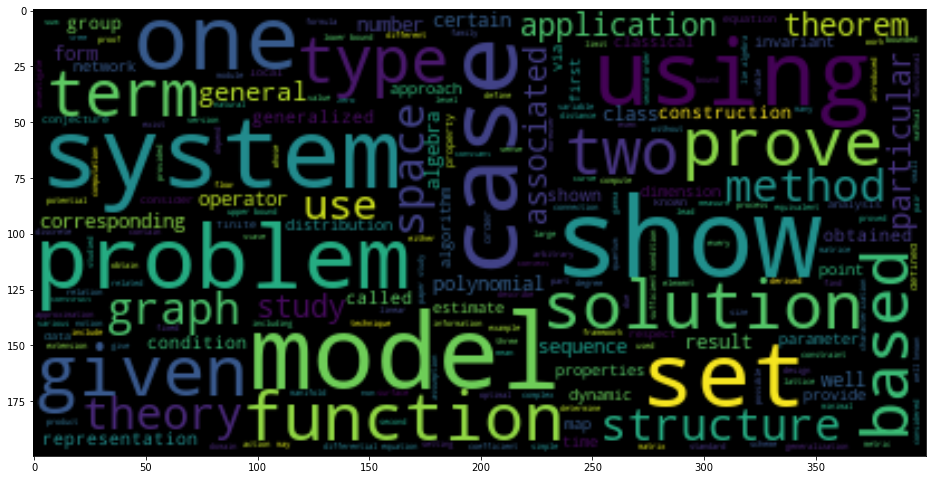

In [53]:
wc=WordCloud(background_color='black',max_font_size=50).generate(corpus)
plt.figure(figsize=(16,12))
plt.imshow(wc,interpolation = 'bilinear')

### Term Frequencies

In [54]:
import nltk
from nltk.tokenize import ToktokTokenizer

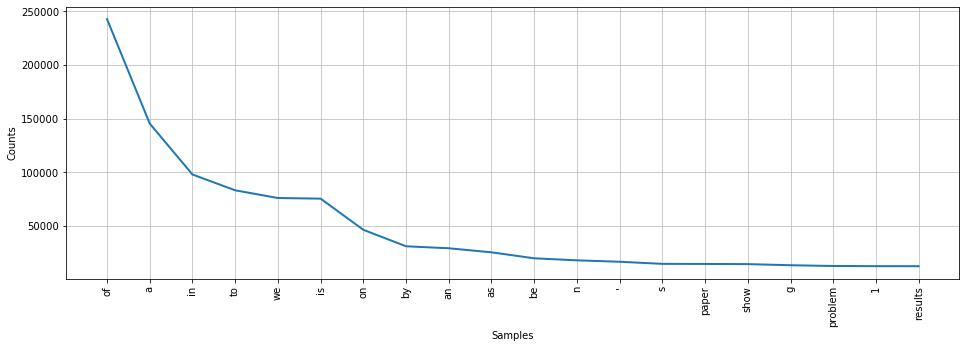

In [56]:
x=nltk.FreqDist(ToktokTokenizer().tokenize(corpus))
plt.figure(figsize=(16,5))
x.plot(20)

D:\Users\rdemaio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
macros = dfp3['macro'].unique()

In [74]:
corpus = pd.DataFrame()
for macro in macros:
    corpus[str(macro)] = reduce(lambda x,y: x + ' ' + y, dfp3[dfp3['macro'] == macro].text)

KeyboardInterrupt: 

In [ ]:
corp_label = corpus.T

In [ ]:
courpus